# Simulating A Pendulum using SciPy

In [106]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
import matplotlib.animation as anim
%matplotlib notebook

## The Simplest Example: Single Pendulum with No Drag

Second order differential equation:

$$
\ddot{\theta} + \frac{g}{L} sin(\theta) = 0
$$

Expand it to a vectorized form (using $\omega = \dot{\theta}$ as angular velocity)

$$
\begin{bmatrix}
    \dot{\theta} \\
    \dot{\omega}
\end{bmatrix} = \begin{bmatrix}
    \omega \\
    -\frac{g}{L} sin(\theta)
\end{bmatrix}
$$

<IPython.core.display.Javascript object>


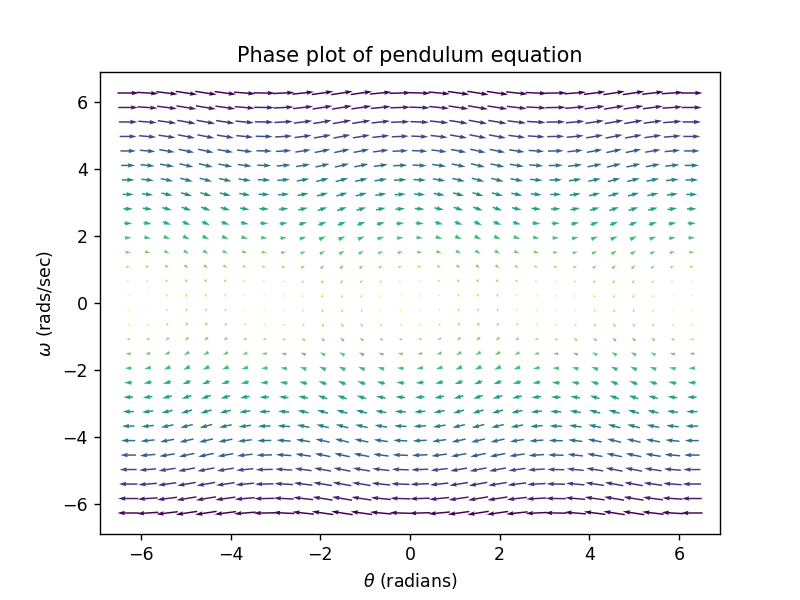

In [129]:
# Constants
g = 9.8
L = 10

# Quiver plot
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30),
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv)
plt.figure()
plt.quiver(thv, omv, thd, omd, np.hypot(thd, omd), pivot='mid')
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase plot of pendulum equation')
plt.show()

Simulate using ode

<IPython.core.display.Javascript object>


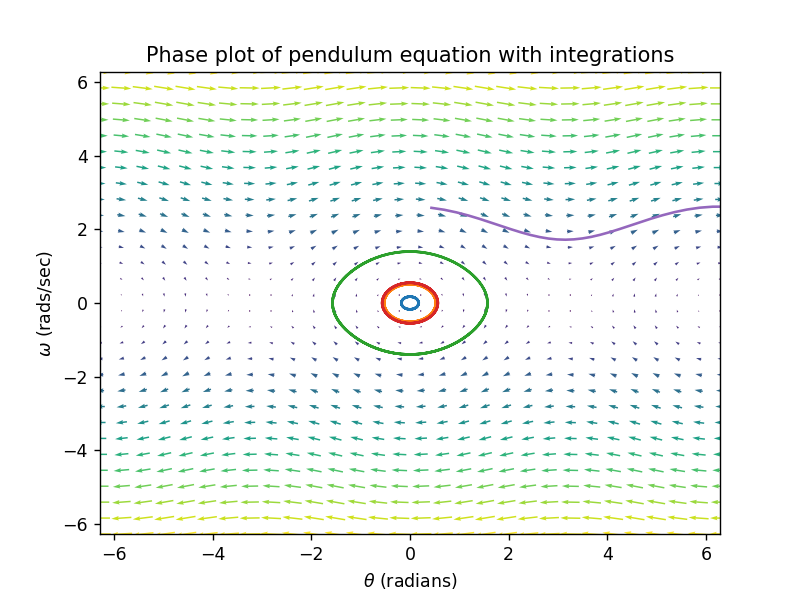

In [130]:
# Integration function
f = lambda t, Th: [Th[1], -(g/L)*np.sin(Th[0])]

# Time bounds
t0, tf, dt = (0.0, 20, 0.1)

def integrate(th0deg, om0deg):
    """
    Integration function
    """
    th0 = th0deg * (np.pi/180)
    om0 = om0deg * (np.pi/180)
    r = ode(f).set_initial_value([th0, om0], t0)
    Th = []
    while r.successful() and r.t < tf:
        Th_i = r.integrate(r.t + dt)
        Th.append(Th_i)
    return np.array(Th)

# Integrations
Ths = [
    integrate(10, 0),
    integrate(30, 0),
    integrate(90, 0),
    integrate(10, 30),
    integrate(10, 150)
]

# Plot all of this garbage
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30), 
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv)
plt.figure()
plt.quiver(thv, omv, thd, omd, np.hypot(thd, omd), pivot='mid')
for Th in Ths:
    plt.plot(Th[:,0], Th[:,1])
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase plot of pendulum equation with integrations')
plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
plt.show()

## Adding Drag

Second order differential equation:

$$
\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{L} sin(\theta) = 0
$$

Expand it to a vectorized form (using $\omega = \dot{\theta}$ as angular velocity)

$$
\begin{bmatrix}
    \dot{\theta} \\
    \dot{\omega}
\end{bmatrix} = \begin{bmatrix}
    \omega \\
    - \frac{b}{m} \omega - \frac{g}{L} sin(\theta)
\end{bmatrix}
$$

<IPython.core.display.Javascript object>


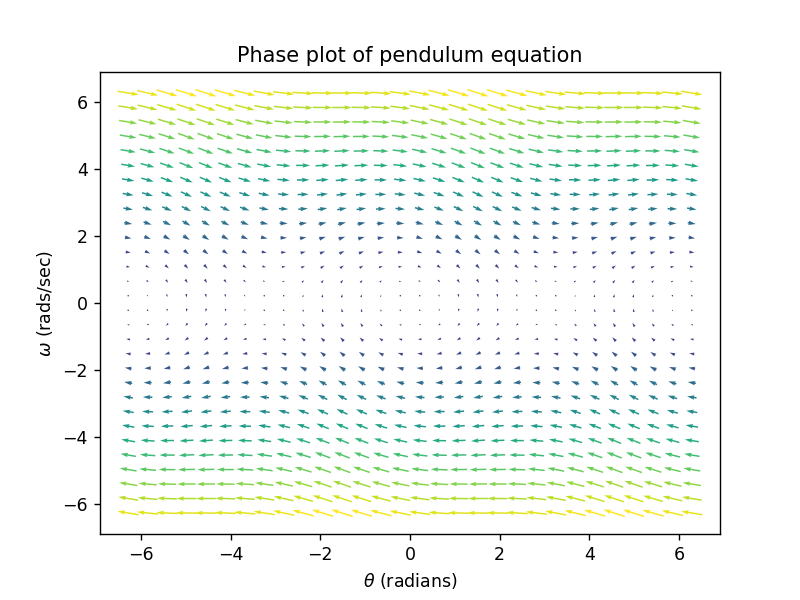

In [133]:
# Constants
g = 9.8
L = 10
b = 0.5
m = 3

# Quiver plot
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30),
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv) - (b/m)*omv
plt.figure()
plt.quiver(thv, omv, thd, omd, np.hypot(thd, omd), pivot='mid')
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase plot of pendulum equation')
plt.show()

Simulate using ode

<IPython.core.display.Javascript object>


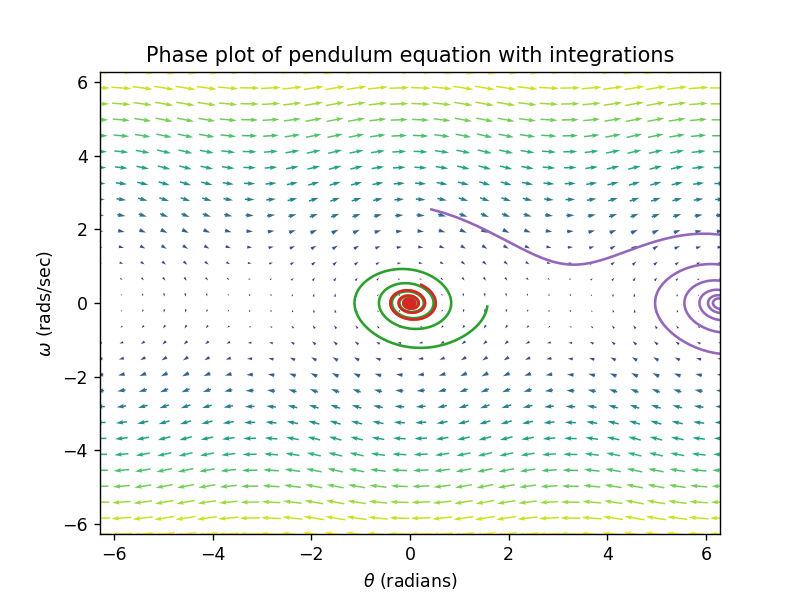

In [137]:
# Integration function
f = lambda t, Th: [Th[1], -(g/L)*np.sin(Th[0]) - (b/m)*Th[1]]

# Time bounds
t0, tf, dt = (0.0, 40, 0.1)

def integrate(th0deg, om0deg):
    """
    Integration function
    """
    th0 = th0deg * (np.pi/180)
    om0 = om0deg * (np.pi/180)
    r = ode(f).set_initial_value([th0, om0], t0)
    Th = []
    while r.successful() and r.t < tf:
        Th_i = r.integrate(r.t + dt)
        Th.append(Th_i)
    return np.array(Th)

# Integrations
Ths = [
    integrate(10, 0),
    integrate(30, 0),
    integrate(90, 0),
    integrate(10, 30),
    integrate(10, 150)
]

# Plot all of this garbage
thv, omv = np.meshgrid(
    np.linspace(-2*np.pi, 2*np.pi, 30), 
    np.linspace(-2*np.pi, 2*np.pi, 30))
thd = omv
omd = -(g/L)*np.sin(thv)
plt.figure()
plt.quiver(thv, omv, thd, omd, np.hypot(thd, omd), pivot='mid')
for Th in Ths:
    plt.plot(Th[:,0], Th[:,1])
plt.xlabel('$\\theta$ (radians)')
plt.ylabel('$\omega$ (rads/sec)')
plt.title('Phase plot of pendulum equation with integrations')
plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
plt.show()